In [1]:
import matplotlib.pyplot as plt
import torch

from cheetah import ParticleBeam

In [2]:
n_runs = 10
dim = 6
n_samples = 10000

cov = torch.diag(torch.tensor((1.0, 1.0, 9.0, 9.0, 1.0, 1.0))) * 1e-6
mean = torch.zeros(dim)
mvnorm = torch.distributions.MultivariateNormal(mean, covariance_matrix=cov)
coords = mvnorm.sample((n_runs, n_samples))
coords = torch.cat((coords, torch.ones(n_runs, n_samples, 1)), dim=-1)

coords.shape

torch.Size([10, 10000, 7])

In [3]:
beam_ensemble = ParticleBeam(particles=coords, energy=torch.tensor(40.0e6))
beam_ensemble.particles.shape

torch.Size([10, 10000, 7])

In [4]:
beam_ensemble.particles.shape

torch.Size([10, 10000, 7])

In [5]:
beam_ensemble.x.shape

torch.Size([10, 10000])

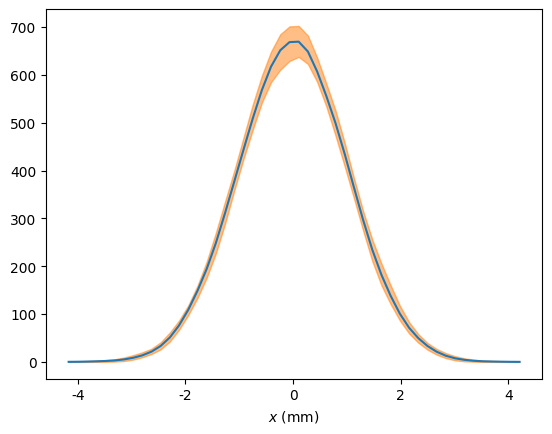

In [11]:
beam_ensemble.plot_1d_distribution(dimension="x", bins=50, smoothing=1.0)
plt.show()

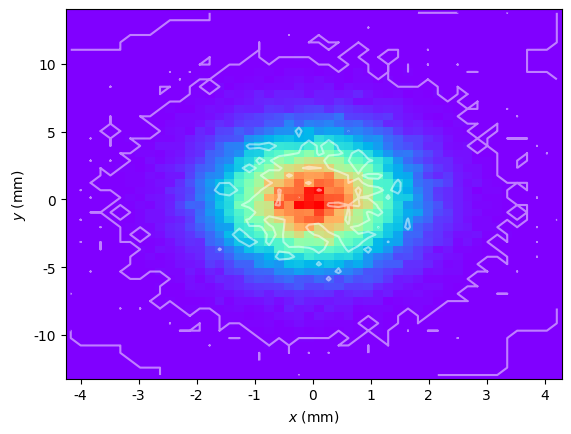

In [12]:
beam_ensemble.plot_2d_distribution(
    x_dimension="x",
    y_dimension="y",
    bins=(50, 50),
    errorbar=("pi", 90),
    confidence_contours=(2,),
    # histogram_smoothing=10.0,
    contour_smoothing=1.0,
    # style="contour",
)
plt.show()

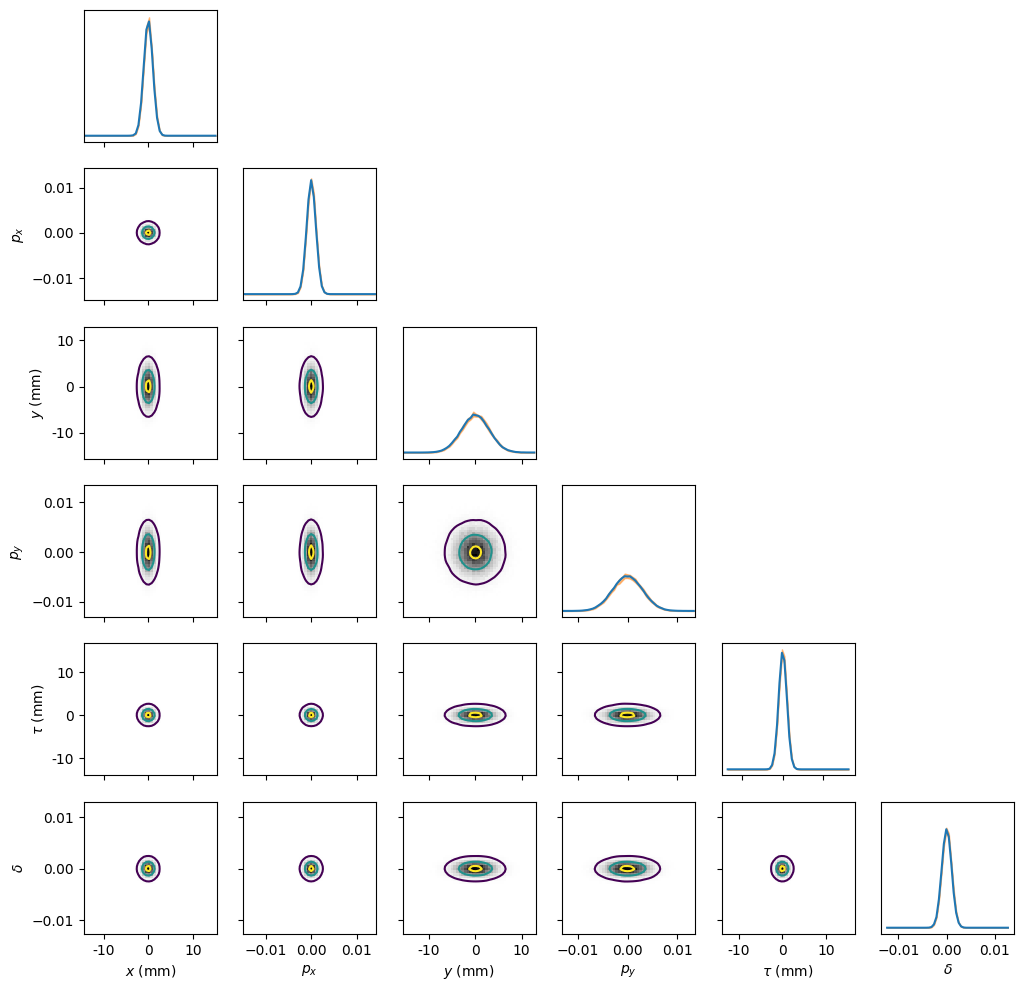

In [8]:
beam_ensemble.plot_distribution(bins=50, plot_2d_kws={"style": "contour"})
plt.show()

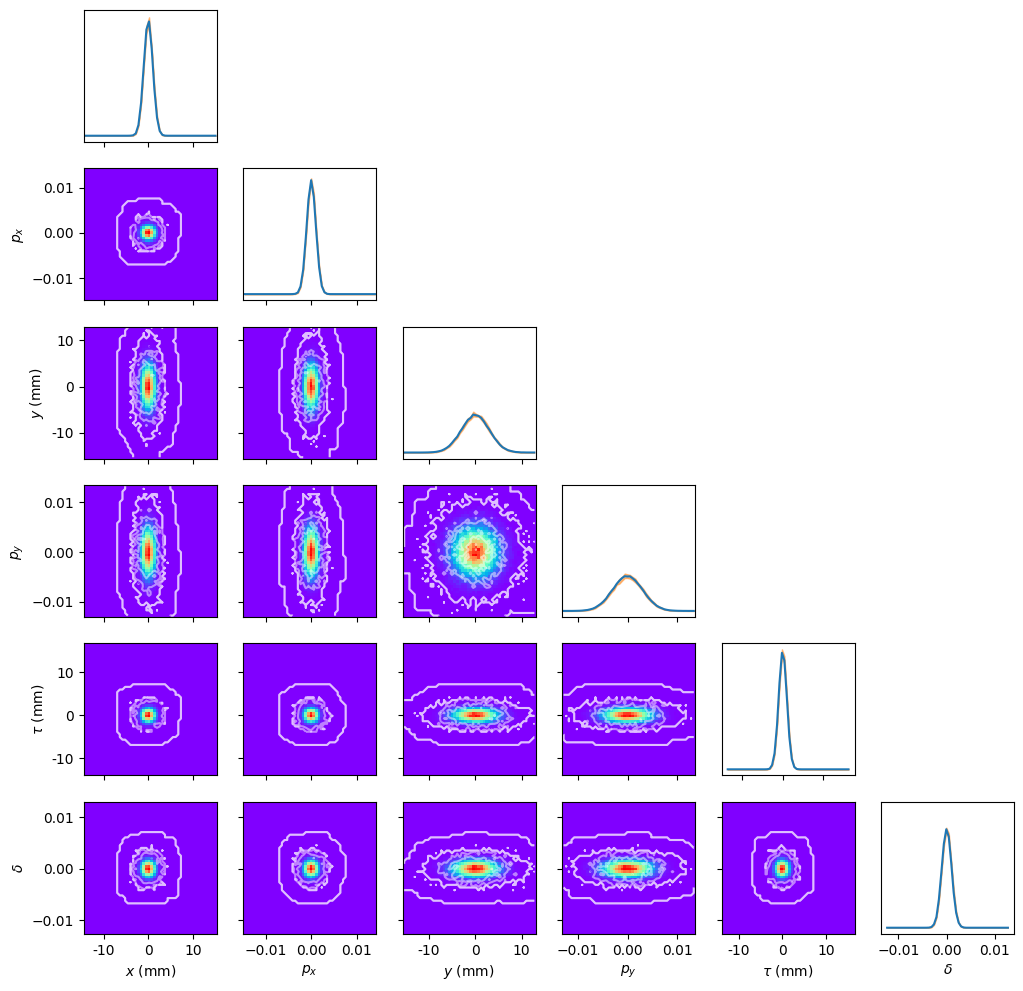

In [9]:
beam_ensemble.plot_distribution(
    bins=50, plot_2d_kws=dict(style="histogram", confidence_contours=(1, 2))
)
plt.show()